In [166]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.svm import SVC
from autograd import grad
import autograd.numpy as autonp

# Q1(a)

In [297]:
iris=datasets.load_iris()
iris.target[iris.target==1]=-1
iris.target[iris.target==2]=-1
iris.target[iris.target==0]=1
iris.target_names=np.array(['setosa','not-setosa'])

irispd=pd.DataFrame(np.c_[iris.data,iris.target],columns=iris.feature_names+['class'])
X=np.array(irispd[['sepal length (cm)', 'petal width (cm)']])
Y=np.array(irispd[irispd.columns[-1]])

In [298]:
X,Y =shuffle(X,Y)

# Q1(a)(i)

In [299]:
def loss_fn(w):
    return 0.5*cp.norm(w, p=2)

In [300]:
w = cp.Variable(2)
b = cp.Variable()

constr =[]
for i in range(len(Y)):
    constr.append(Y[i]*((X[i,:]@w)+b)-1>= 0)

prob = cp.Problem(cp.Minimize(loss_fn(w)),constr)

In [301]:
prob.solve()

2.500000000001705

# Q1(a)(ii)

In [302]:
for c in constr:
    print(c.dual_value)

2.9715821347779286e-13
2.933650572509901e-13
1.835143712861622e-12
9.960353443406847e-13
1.323723668595009e-12
4.328737035141712e-13
7.746365195530789e-13
7.517477784867998e-13
7.89163055389307e-13
7.92187191100413e-13
9.82036438326585e-13
4.841080026459414e-13
9.231947824579559e-13
2.0192303133979634e-12
3.4505506375176683e-13
3.4995225426263383e-13
0.23237912393111773
1.285860632659709e-12
2.9907158351976675e-13
9.912824294931825e-13
4.806239341452126e-13
3.2276191321897083e-13
1.2794666308422396e-12
9.866016989800306e-13
7.582413188709501e-13
7.498818367353729e-13
6.369102276328899e-13
1.853116000497417e-12
7.60683396440795e-13
7.430272924026777e-13
9.960353443406847e-13
1.0102932435288673e-12
3.8511927929352233e-13
3.9235804228851937e-13
9.349993498202172e-13
9.912824294931825e-13
4.711858943834658e-13
3.4762971616230863e-13
9.701926915350455e-13
1.957487604110217e-12
8.016573999065663e-13
9.82036438326585e-13
9.912824294931825e-13
2.0192303133979634e-12
2.8094374796985574e-13
2.01

In [303]:
sup_vec_x=[]
sup_vec_y=[]

for j in range(len(Y)):
    s = np.array((X[j,:]@w.value))[0][0] + b.value
    if (abs(s) < 1.0001 and abs(s) > 0.999):
        sup_vec_x.append(X[j,:])
        sup_vec_y.append(Y[j])

# Q1(a)(iii)

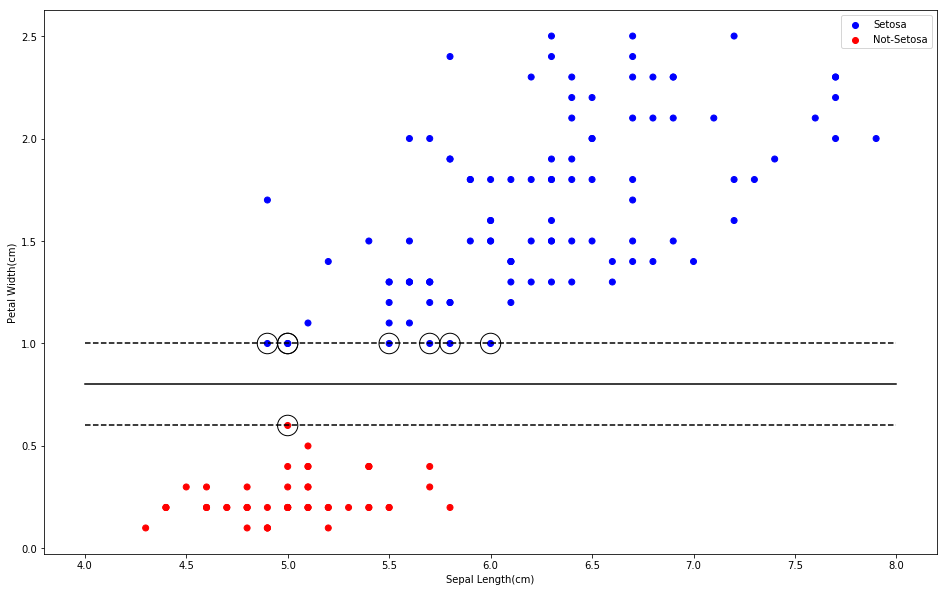

In [304]:
x = np.linspace(4,8,10)
m1= np.array((-1 - b.value - w.value[0]*x)/w.value[1])
m2= np.array((1 - b.value - w.value[0]*x)/w.value[1])
m= np.array(( - b.value - w.value[0]*x)/w.value[1])

plt.rcParams['figure.figsize'] = (16,10)
ax = plt.gca()

s=plt.scatter(X[:,0],X[:,1], c=Y, cmap=ListedColormap(['blue', 'red']))
plt.legend((s,s),['Setosa', 'Not-Setosa'])
legend = ax.get_legend()
legend.legendHandles[1].set_color('red')
legend.legendHandles[0].set_color('blue')
plt.plot(x,m1[0,:],'--',c='black')
plt.plot(x,m[0,:],'k',)
plt.plot(x,m2[0,:],'--',c='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Width(cm)')

for d in sup_vec_x:
    cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
    ax.add_artist(cir)
plt.show()

# Q1(a)(iv)

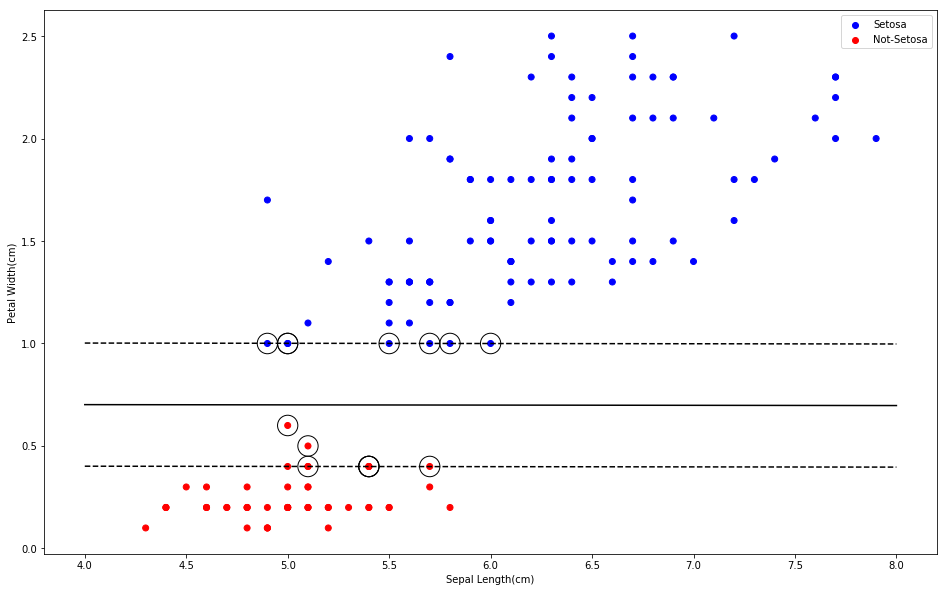

In [305]:
model = SVC(kernel='linear')
model.fit(X,Y)
sup_vec = model.support_vectors_
w_sk = model.coef_[0]
b_sk = model.intercept_

x = np.linspace(4,8,10)
m1= (-1 - b_sk - w_sk[0]*x)/w_sk[1]
m2= (1 - b_sk - w_sk[0]*x)/w_sk[1]
m= ( - b_sk - w_sk[0]*x)/w_sk[1]

plt.rcParams['figure.figsize'] = (16,10)
ax = plt.gca()

s=plt.scatter(X[:,0],X[:,1], c=Y, cmap=ListedColormap(['blue', 'red']))
plt.legend((s,s),['Setosa', 'Not-Setosa'])
legend = ax.get_legend()
legend.legendHandles[1].set_color('red')
legend.legendHandles[0].set_color('blue')
plt.plot(x,m1,'--',c='black')
plt.plot(x,m,'k',)
plt.plot(x,m2,'--',c='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Width(cm)')

for d in sup_vec:
    cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
    ax.add_artist(cir)
plt.show()

# Q1(a)(v)

In [162]:
w_sv = cp.Variable(2)
b_sv = cp.Variable()

constr_sv =[]
for i in range(len(sup_vec_y)):
    constr_sv.append(sup_vec_y[i]*((sup_vec_x[i]@w_sv)+b_sv)-1>= 0)

prob = cp.Problem(cp.Minimize(loss_fn(w_sv)),constr_sv)

In [163]:
prob.solve()

2.499999998349874

In [164]:
sup_vec_x_sv=[]
sup_vec_y_sv=[]

for j in range(len(sup_vec_y)):
    s = np.array((sup_vec_x[j]@w_sv.value))[0][0] + b_sv.value
    if abs(round(s)) == 1.0:
        sup_vec_x_sv.append(X[j,:])
        sup_vec_y_sv.append(Y[j])

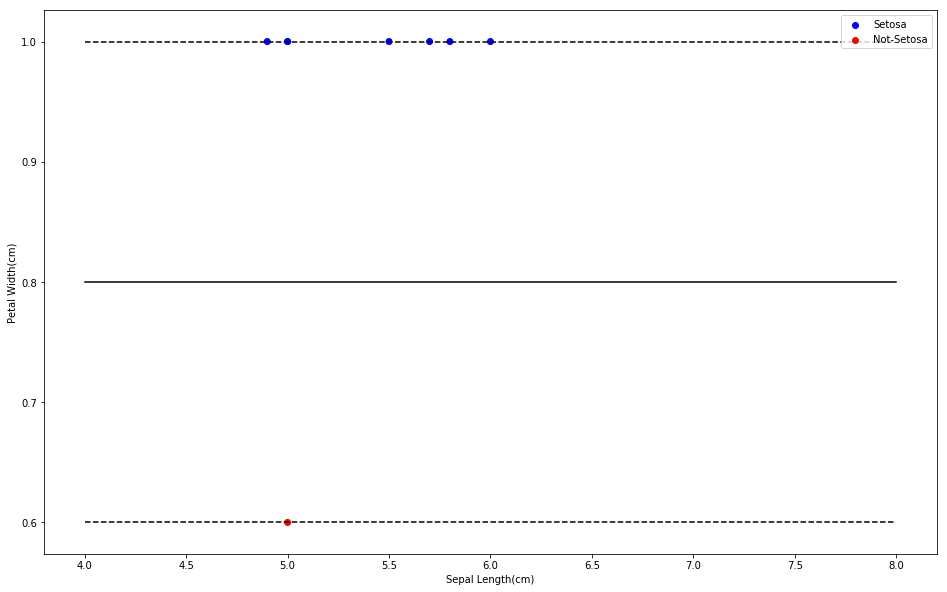

In [165]:
x = np.linspace(4,8,10)
m1= np.array((-1 - b_sv.value - w_sv.value[0]*x)/w_sv.value[1])
m2= np.array((1 - b_sv.value - w_sv.value[0]*x)/w_sv.value[1])
m= np.array(( - b_sv.value - w_sv.value[0]*x)/w_sv.value[1])

plt.rcParams['figure.figsize'] = (16,10)
ax = plt.gca()

s=plt.scatter(np.array(sup_vec_x)[:,0],np.array(sup_vec_x)[:,1], c=sup_vec_y, cmap=ListedColormap(['blue', 'red']))
plt.legend((s,s),['Setosa', 'Not-Setosa'])
legend = ax.get_legend()
legend.legendHandles[1].set_color('red')
legend.legendHandles[0].set_color('blue')
plt.plot(x,m1[0,:],'--',c='black')
plt.plot(x,m[0,:],'k',)
plt.plot(x,m2[0,:],'--',c='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Petal Width(cm)')

# for d in sup_vec_x_sv:
#     cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
#     ax.add_artist(cir)
plt.show()

# Q1(b)

In [342]:
iris=datasets.load_iris()
iris.target[iris.target==0]=-1
iris.target[iris.target==1]=-1
iris.target[iris.target==2]=1
iris.target_names=np.array(['virginica','not-virginica'])

irispd=pd.DataFrame(np.c_[iris.data,iris.target],columns=iris.feature_names+['class'])
X=np.array(irispd[['sepal length (cm)', 'sepal width (cm)']])
Y=np.array(irispd[irispd.columns[-1]])

# Q1(b)(i)

In [343]:
def a_opt(wb, X, Y, C):
    h = 0
    w1_a = wb[0]
    w2_a = wb[1]
    b_a = wb[2]
    
    for i in range(len(Y)):
        h += max(0, 1-Y[i]*(X[i,0]*w1_a+X[i,1]*w2_a+b_a))
    p = (0.5/C)*(w1_a**2 + w2_a**2)
    return p+h

In [368]:
def a_svm(X, Y, C, n_iter=10, al = 0.1):
    np.random.seed(4)
    w1 = np.random.rand()
    w2 = np.random.rand()
    b = np.random.rand()
    
    gradient = grad(a_opt)
    
    for i in range(n_iter):
        wb = [w1,w2,b]
        w1_t,w2_t,b_t = gradient(wb, X, Y, C)
#         print(gradient(wb, X, Y, C))
        w1 += -al*w1_t
        w2 += -al*w2_t
        b += -al*b_t
    return wb

In [373]:
wb=a_svm(X, Y, 1, 100)
wb

[15.595736215773314, -12.598187187592089, -56.227315640035116]

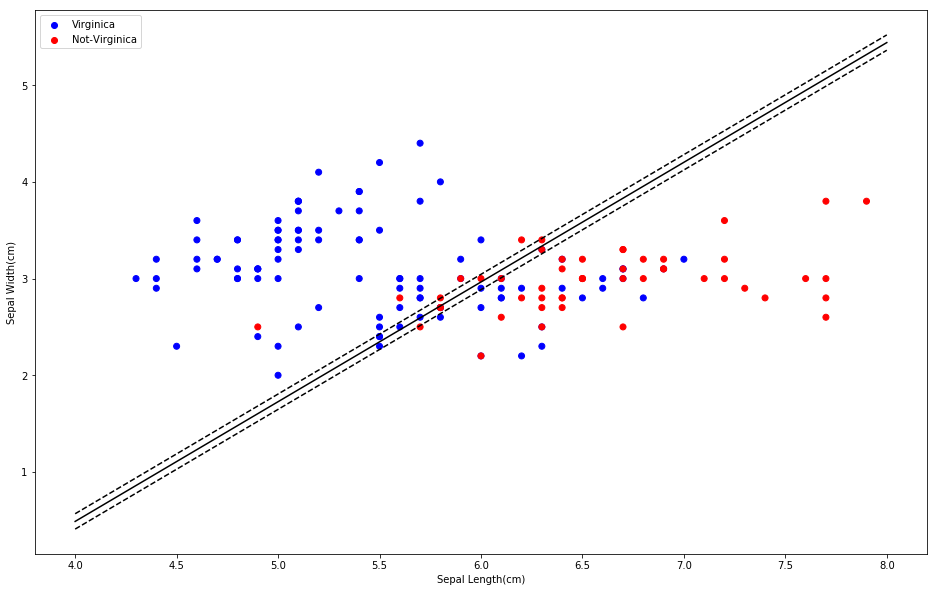

In [374]:
# y = np.linspace(1.5,5,10)
# m1= np.array((-1 - wb[2] - wb[1]*y)/wb[0])
# m2= np.array((1 - wb[2] - wb[1]*y)/wb[0])
# m= np.array(( - wb[2] - wb[1]*y)/wb[0])
x = np.linspace(4,8,10)
m1= np.array((-1 - wb[2] - wb[0]*x)/wb[1])
m2= np.array((1 - wb[2] - wb[0]*x)/wb[1])
m= np.array(( - wb[2] - wb[0]*x)/wb[1])

plt.rcParams['figure.figsize'] = (16,10)
ax = plt.gca()

s=plt.scatter(X[:,0],X[:,1], c=Y, cmap=ListedColormap(['blue', 'red']))
plt.legend((s,s),['Virginica', 'Not-Virginica'])
legend = ax.get_legend()
legend.legendHandles[1].set_color('red')
legend.legendHandles[0].set_color('blue')
plt.plot(x,m1,'--',c='black')
plt.plot(x,m,'k',)
plt.plot(x,m2,'--',c='black')
# plt.plot(m1,y,'--',c='black')
# plt.plot(m,y,'k',)
# plt.plot(m2,y,'--',c='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')

# for d in sup_vec:
#     cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
#     ax.add_artist(cir)
plt.show()

# Q1(b)(ii)

In [236]:
def loss_fn_hinge(X, Y, w, b, C):
    h = 0
    
    for i in range(len(Y)):
        h += cp.max_elemwise(0, 1-Y[i]*(X[i,:]@w+b))
        
    p = (0.5/C)*cp.norm(w, p=2)
    return p+h

In [240]:
w = cp.Variable(2)
b = cp.Variable()
C = 10

prob = cp.Problem(cp.Minimize(loss_fn_hinge(X, Y, w, b, C)))
prob.solve()

65.49999998912196

In [241]:
sup_vec = []

for i in range(len(Y)):
    t = np.array(Y[i]*(X[i,:]@w.value+b.value))[0][0]
    ep = max(0, 1-t)
    
    if (round(t) == 1 or ep>0):
        sup_vec.append(X[i,:])


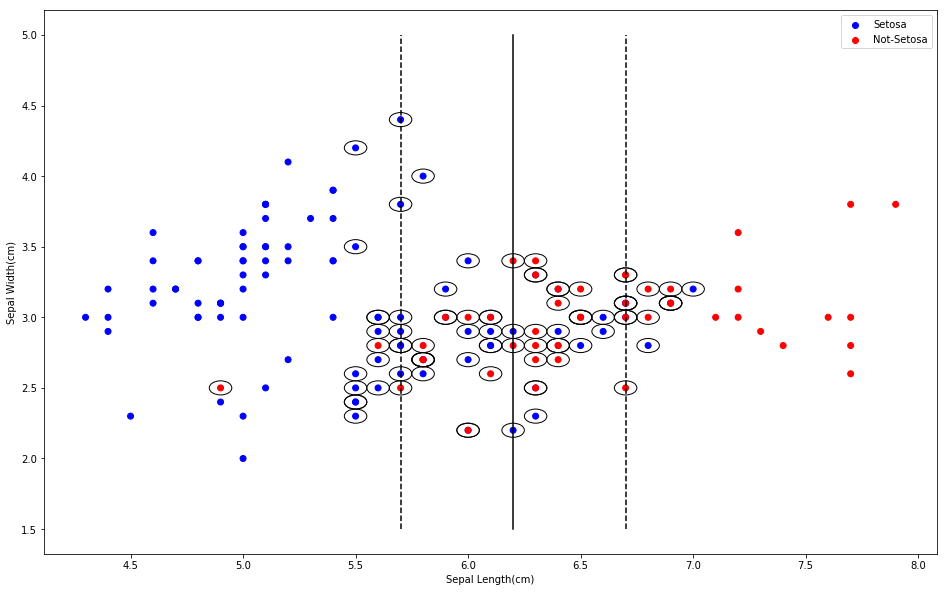

In [242]:
y = np.linspace(1.5,5,10)
m1= np.array((-1 - b.value - w.value[1]*y)/w.value[0])
m2= np.array((1 - b.value - w.value[1]*y)/w.value[0])
m= np.array(( - b.value - w.value[1]*y)/w.value[0])

plt.rcParams['figure.figsize'] = (16,10)
ax = plt.gca()

s=plt.scatter(X[:,0],X[:,1], c=Y, cmap=ListedColormap(['blue', 'red']))
plt.legend((s,s),['Virginica', 'Not-Virginica'])
legend = ax.get_legend()
legend.legendHandles[1].set_color('red')
legend.legendHandles[0].set_color('blue')
plt.plot(m1[0,:],y,'--',c='black')
plt.plot(m[0,:],y,'k',)
plt.plot(m2[0,:],y,'--',c='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')

for d in sup_vec:
    cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
    ax.add_artist(cir)
plt.show()

# Q1(b)(iii)

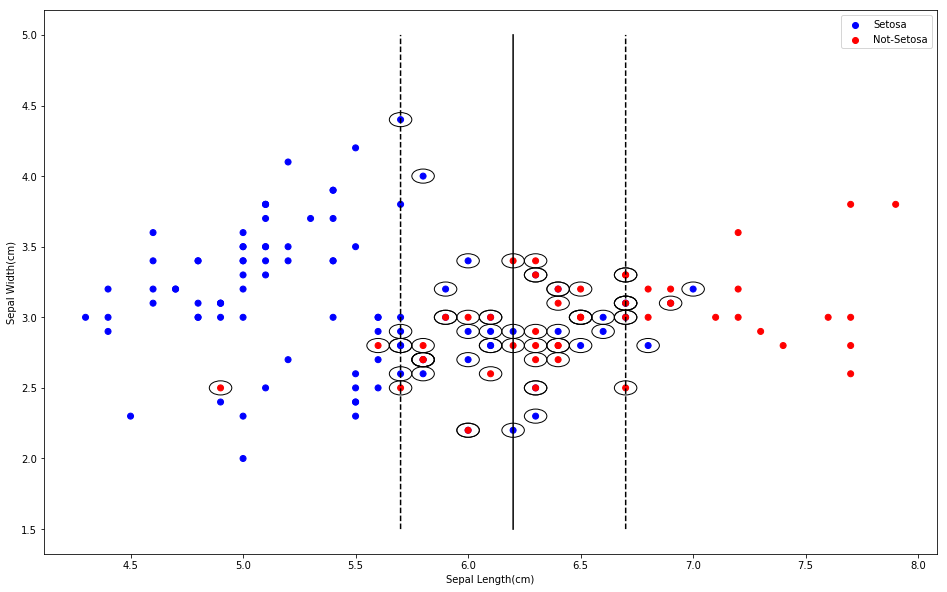

In [244]:
model = SVC(kernel='linear', C=10)
model.fit(X,Y)
sup_vec = model.support_vectors_
w_sk = model.coef_[0]
b_sk = model.intercept_

y = np.linspace(1.5,5,10)
m1= (-1 - b_sk - w_sk[1]*y)/w_sk[0]
m2= (1 - b_sk - w_sk[1]*y)/w_sk[0]
m= ( - b_sk - w_sk[1]*y)/w_sk[0]

plt.rcParams['figure.figsize'] = (16,10)
ax = plt.gca()

s=plt.scatter(X[:,0],X[:,1], c=Y, cmap=ListedColormap(['blue', 'red']))
plt.legend((s,s),['Virginca', 'Not-Virginica'])
legend = ax.get_legend()
legend.legendHandles[1].set_color('red')
legend.legendHandles[0].set_color('blue')
plt.plot(m1,y,'--',c='black')
plt.plot(m,y,'k',)
plt.plot(m2,y,'--',c='black')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')

for d in sup_vec:
    cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
    ax.add_artist(cir)
plt.show()

# Q1(b)(iv)

In [390]:
x0, x1 = np.meshgrid(np.arange(np.amin(X[:,0])-0.05, np.amax(X[:,0])+0.05, 0.01), np.arange(np.min(X[:,1])-0.05, np.max(X[:,1])+0.05, 0.01))

for dg in range(1,10):
    plt.gcf().clear()
    model = SVC(kernel='poly', degree = dg)
    model.fit(X, Y)
    pred = model.decision_function(np.c_[x0.ravel(), x1.ravel()])
    sup_vec_p = model.support_vectors_
    ax = plt.gca()
    for i in range(len(pred)):
        if pred[i] > 1 :
            pred[i] = 1
        elif pred[i] < -1 :
            pred[i] = -1
        elif pred[i] < 0 :
            pred[i] = -0.5
        else :
            pred[i] = 0.5
    
    pred = pred.reshape(x0.shape)
    s=plt.scatter(X[:,0], X[:,1], c=Y, cmap=ListedColormap(['blue','red']))
    for d in sup_vec_p:
        cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
        ax.add_artist(cir)
    plt.pcolormesh(x0, x1, pred, alpha=0.3, cmap='Wistia')
    plt.title('Polynomial Kernel Degree: '+str(dg))
    plt.xlabel('Sepal length(cm)')
    plt.ylabel('Sepal width(cm)')
    plt.legend((s,s),['Virginica', 'Not-Virginica'])
    legend = ax.get_legend()
    legend.legendHandles[1].set_color('red')
    legend.legendHandles[0].set_color('blue')
#     plt.show()
    
    filename=str(format(dg, '03d'))+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

In [391]:
! convert -delay 60 *.png Q2iv1.gif
from IPython.display import Image
Image(url='Q2iv1.gif') 

In [388]:
x0, x1 = np.meshgrid(np.arange(np.amin(X[:,0])-0.05, np.amax(X[:,0])+0.05, 0.01), np.arange(np.min(X[:,1])-0.05, np.max(X[:,1])+0.05, 0.01))

for g in range(1,101,10):
    plt.gcf().clear()
    model = SVC(kernel='rbf', gamma = g)
    model.fit(X, Y)
    pred = model.decision_function(np.c_[x0.ravel(), x1.ravel()])
    sup_vec_gam = model.support_vectors_
    ax = plt.gca()
    for i in range(len(pred)):
        if pred[i] > 1 :
            pred[i] = 1
        elif pred[i] < -1 :
            pred[i] = -1
        elif pred[i] < 0 :
            pred[i] = -0.5
        else :
            pred[i] = 0.5
    
    pred = pred.reshape(x0.shape)
    s=plt.scatter(X[:,0], X[:,1], c=Y, cmap=ListedColormap(['blue','red']))
    for d in sup_vec_gam:
        cir=plt.Circle((d[0],d[1]),radius=0.05,fill=False, color='black')
        ax.add_artist(cir)
    plt.pcolormesh(x0, x1, pred, alpha=0.3, cmap='Wistia')
    plt.title('Polynomial Kernel Degree: '+str(g))
    plt.xlabel('Sepal length(cm)')
    plt.ylabel('Sepal width(cm)')
    plt.legend((s,s),['Virginica', 'Not-Virginica'])
    legend = ax.get_legend()
    legend.legendHandles[1].set_color('red')
    legend.legendHandles[0].set_color('blue')
#     plt.show()
    
    filename=str(format(g, '03d'))+'.jpg'
    plt.savefig(filename, dpi=96)
    plt.gca()

In [389]:
! convert -delay 60 *.jpg Q2iv2.gif
from IPython.display import Image
Image(url='Q2iv2.gif') 